# INF552 HW-6 Zhifeng Liu 2912549136

## 2. Active Learning Using Support Vector Machines

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

(a) Download the banknote authentication Data Set. Choose 472 data points ran-domly as the test set, and the remaining 900 points as the training set. 

In [23]:
data = pd.read_csv("./data_banknote_authentication.txt",header=None)
print(data.head())
x = data.drop([4], axis=1)
y = data.loc[:,[4]]
nor_x = (x-x.min())/(x.max()-x.min())
train_x, test_x, train_y, test_y = train_test_split(nor_x, y, test_size = 472)

         0       1       2        3  4
0  3.62160  8.6661 -2.8073 -0.44699  0
1  4.54590  8.1674 -2.4586 -1.46210  0
2  3.86600 -2.6383  1.9242  0.10645  0
3  3.45660  9.5228 -4.0112 -3.59440  0
4  0.32924 -4.4552  4.5718 -0.98880  0


#### (b)i. Passive learning with Monte-Carlo Simulation

In [28]:
columns = np.arange(10,901,10)
err_table = pd.DataFrame(columns=columns.tolist())
def model_select(train_x, train_y, cv):
    model = LinearSVC(penalty='l1',dual=False,tol=0.0001)
    penalties = list(10**exp for exp in range(-3,6))
    parameters = {'C':penalties}
    clf = GridSearchCV(model, parameters, cv = cv)
    clf.fit(train_x, train_y)
    return clf.best_estimator_

def passive_learn(times):
    test_err=[]
    X_use, X_notuse, y_use, y_notuse = train_test_split(train_x, train_y, train_size = 10, stratify= train_y)
    opt_model = model_select(X_use,y_use,5)
    error = 1 - opt_model.score(test_x, test_y)
    test_err.append(error)
    
    while X_notuse.size > 50:
        X_pick, X_notuse, y_pick, y_notuse = train_test_split(X_notuse, y_notuse, train_size = 10, stratify= y_notuse)
        X_use = X_use.append(X_pick, ignore_index=True)
        y_use = y_use.append(y_pick, ignore_index=True)
        opt_model = model_select(X_use,y_use,10)
        error = 1 - opt_model.score(test_x, test_y)
        test_err.append(error)
        
    X_use = X_use.append(X_pick, ignore_index=True)
    y_use = y_use.append(y_pick, ignore_index=True)
    opt_model = model_select(X_use,y_use,10)
    error = 1 - opt_model.score(test_x, test_y)
    test_err.append(error)
    err_table.loc[times] = test_err
    print(test_err)

In [29]:
for i in range(0,50):
    print("\nThe No.%d experiment in Monte-Carlo:" %(i+1))
    passive_learn(i)
err_avg = err_table.mean()

print("\n\nThe Average of test error for different size of datasets:")
print(err_avg)
    
        


The No.1 experiment in Monte-Carlo:
[0.2076271186440678, 0.1652542372881356, 0.13347457627118642, 0.044491525423728806, 0.044491525423728806, 0.025423728813559365, 0.01906779661016944, 0.016949152542372836, 0.02330508474576276, 0.021186440677966156, 0.01906779661016944, 0.029661016949152574, 0.029661016949152574, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02754237288135597, 0.02330508474576276, 0.029661016949152574, 0.01906779661016944, 0.01906779661016944, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.016949152542372836, 0.016949152542372836, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.0190

[0.13771186440677963, 0.044491525423728806, 0.0423728813559322, 0.03813559322033899, 0.05084745762711862, 0.048728813559322015, 0.044491525423728806, 0.029661016949152574, 0.029661016949152574, 0.029661016949152574, 0.02754237288135597, 0.03813559322033899, 0.02754237288135597, 0.02754237288135597, 0.029661016949152574, 0.029661016949152574, 0.029661016949152574, 0.025423728813559365, 0.02754237288135597, 0.02330508474576276, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.025423728813559365, 0.025423728813559365, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.0

[0.07627118644067798, 0.03389830508474578, 0.03601694915254239, 0.03177966101694918, 0.03177966101694918, 0.02754237288135597, 0.02754237288135597, 0.029661016949152574, 0.02754237288135597, 0.02754237288135597, 0.029661016949152574, 0.03177966101694918, 0.029661016949152574, 0.03177966101694918, 0.03177966101694918, 0.03177966101694918, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.02754237288135597, 0.02754237288135597, 0.03177966101694918, 0.03177966101694918, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.02754237288135597, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.025423728813559365, 0.02330508474576276, 0.02330508474576276, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944,

[0.1313559322033898, 0.1610169491525424, 0.11440677966101698, 0.125, 0.04661016949152541, 0.0402542372881356, 0.029661016949152574, 0.029661016949152574, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.03177966101694918, 0.03389830508474578, 0.03389830508474578, 0.02754237288135597, 0.03177966101694918, 0.02754237288135597, 0.03177966101694918, 0.03177966101694918, 0.03177966101694918, 0.02754237288135597, 0.02754237288135597, 0.029661016949152574, 0.01906779661016944, 0.025423728813559365, 0.025423728813559365, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944,

[0.13771186440677963, 0.029661016949152574, 0.03601694915254239, 0.03177966101694918, 0.0402542372881356, 0.0402542372881356, 0.04661016949152541, 0.03813559322033899, 0.0402542372881356, 0.03389830508474578, 0.03601694915254239, 0.03177966101694918, 0.029661016949152574, 0.029661016949152574, 0.029661016949152574, 0.029661016949152574, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.029661016949152574, 0.025423728813559365, 0.02754237288135597, 0.029661016949152574, 0.02754237288135597, 0.029661016949152574, 0.029661016949152574, 0.029661016949152574, 0.029661016949152574, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.0254237288135

[0.14194915254237284, 0.03389830508474578, 0.03813559322033899, 0.03813559322033899, 0.03389830508474578, 0.03601694915254239, 0.03389830508474578, 0.03389830508474578, 0.03389830508474578, 0.03813559322033899, 0.0423728813559322, 0.03813559322033899, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.029661016949152574, 0.029661016949152574, 0.029661016949152574, 0.03389830508474578, 0.03389830508474578, 0.03813559322033899, 0.03389830508474578, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.03601694915254239, 0.029661016949152574, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.021186440677966156, 0.021186440677966156, 0.02330508474576276, 0.029661016949152574, 0.021186440677966156, 0.01906779661016944, 0.02754237288135597, 0.02754237288135597, 0.02330508474576276, 0.02754237288135597, 0.02754237288135597, 0.025423728813559365, 0.02754237288135597, 0.02330508474576276, 0.02

[0.02754237288135597, 0.03389830508474578, 0.025423728813559365, 0.02754237288135597, 0.09110169491525422, 0.03813559322033899, 0.03813559322033899, 0.03601694915254239, 0.0423728813559322, 0.0423728813559322, 0.01906779661016944, 0.02330508474576276, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02330508474576276, 0.02754237288135597, 0.02330508474576276, 0.02754237288135597, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.021186440677966156, 0.021186440677966156, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906

[0.05084745762711862, 0.05508474576271183, 0.05508474576271183, 0.052966101694915224, 0.05508474576271183, 0.03813559322033899, 0.02754237288135597, 0.02330508474576276, 0.021186440677966156, 0.025423728813559365, 0.02754237288135597, 0.029661016949152574, 0.02330508474576276, 0.016949152542372836, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.021186440677966156, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016

[0.1271186440677966, 0.025423728813559365, 0.02754237288135597, 0.025423728813559365, 0.021186440677966156, 0.02330508474576276, 0.02330508474576276, 0.021186440677966156, 0.021186440677966156, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.02330508474576276, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.

[0.03601694915254239, 0.05720338983050843, 0.029661016949152574, 0.048728813559322015, 0.0402542372881356, 0.04661016949152541, 0.044491525423728806, 0.04661016949152541, 0.04661016949152541, 0.029661016949152574, 0.025423728813559365, 0.03389830508474578, 0.025423728813559365, 0.02330508474576276, 0.02330508474576276, 0.029661016949152574, 0.029661016949152574, 0.02754237288135597, 0.02754237288135597, 0.029661016949152574, 0.029661016949152574, 0.02754237288135597, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.02754237288135597, 0.025423728813559365, 0.01906779661016944, 0.025423728813559365, 0.01906779661016944, 0.01906779661016

#### (b)ii. Active learning with Monte-Carlo Simulation

In [44]:
import heapq
err_table2 = pd.DataFrame(columns=columns.tolist())
def model_select2(train_x, train_y, cv):
    model = LinearSVC(penalty='l1',dual=False,tol=0.0001)
    penalties = list(10**exp for exp in range(-3,6))
    parameters = {'C':penalties}
    clf = GridSearchCV(model, parameters, cv = cv)
    clf.fit(train_x, train_y)
    return clf.best_estimator_

def active_learn(times):
    test_err2=[]
    X_use, X_notuse, y_use, y_notuse = train_test_split(train_x, train_y, train_size = 10, stratify= train_y)
    opt_model = model_select2(X_use,y_use,5)
    error = 1 - opt_model.score(test_x, test_y)
    test_err2.append(error)
    
    while not(X_notuse.empty):
        dists = np.absolute(opt_model.decision_function(X_notuse))
        indices = X_notuse.index.tolist()
        pos_dists = dict(zip(indices,dists))

        add_index = heapq.nsmallest(10,pos_dists,key=pos_dists.get)
#         dist= pd.DataFrame()
#         dist = pd.DataFrame(opt_model.decision_function(X_notuse)).abs().sort_values(by = [0],ascending = False)
#         add_index = dist.iloc[0:10,:].index
        pick_data_x = X_notuse.loc[add_index,:]
        pick_data_y = y_notuse.loc[add_index,:]
        
        X_use = X_use.append(pick_data_x, ignore_index=True)
        y_use = y_use.append(pick_data_y, ignore_index=True)
        X_notuse = X_notuse.drop(add_index)
        y_notuse = y_notuse.drop(add_index)
        
        opt_model = model_select2(X_use,y_use,10)
        error = 1 - opt_model.score(test_x, test_y)
        test_err2.append(error)
    err_table2.loc[times] = test_err2
    print(test_err2)

In [45]:
for i in range(0,50):
    print("\nThe No.%d experiment in Monte-Carlo:" %(i+1))
    active_learn(i)
err_avg2 = err_table2.mean()

print("\n\nThe Average of test error for different size of datasets:")
print(err_avg2)
    


The No.1 experiment in Monte-Carlo:
[0.11440677966101698, 0.09110169491525422, 0.02754237288135597, 0.016949152542372836, 0.021186440677966156, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.025423728813559365, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.02754237288135597, 0.025423728813559365, 0.02754237288135597, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.0

[0.3008474576271186, 0.18220338983050843, 0.03389830508474578, 0.03601694915254239, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.025423728813559365, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.025423728813559365, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372

[0.02754237288135597, 0.09533898305084743, 0.025423728813559365, 0.05508474576271183, 0.03389830508474578, 0.025423728813559365, 0.01906779661016944, 0.021186440677966156, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.01694915

[0.19279661016949157, 0.03813559322033899, 0.025423728813559365, 0.014830508474576232, 0.016949152542372836, 0.02330508474576276, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.025423728813559365, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.019067796610169

[0.22033898305084743, 0.048728813559322015, 0.025423728813559365, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.01694915254

[0.04661016949152541, 0.021186440677966156, 0.025423728813559365, 0.02754237288135597, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.025423728813559365, 0.025423728813559365, 0.025423728813559365, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01694915

[0.05720338983050843, 0.06355932203389836, 0.016949152542372836, 0.02754237288135597, 0.021186440677966156, 0.021186440677966156, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.025423728813559365, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906

[0.03813559322033899, 0.08898305084745761, 0.11652542372881358, 0.03601694915254239, 0.021186440677966156, 0.021186440677966156, 0.02330508474576276, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.0169

[0.0847457627118644, 0.02754237288135597, 0.01906779661016944, 0.025423728813559365, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.025423728813559365, 0.016949152542372836, 0.02754237288135597, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.025423728813559365, 0.025423728813559365, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.02754237288135597, 0.025423728813559365, 0.02542372881355

[0.05084745762711862, 0.044491525423728806, 0.03389830508474578, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779

(c) Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

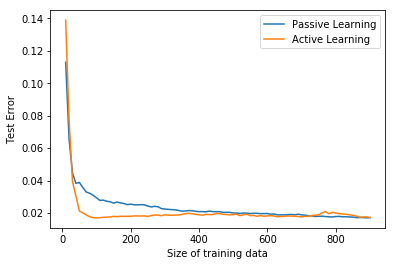

In [47]:
plt.plot(columns, err_avg, label='Passive Learning')
plt.plot(columns, err_avg2, label='Active Learning')
plt.legend(loc='higher right')
plt.xlabel('Size of training data')
plt.ylabel('Test Error')
plt.show()